# Viewing Single-Point Data
#### This notebook will demonstrate how to extract a single point of data and some options for displaying it.

## Setup

In [2]:
import os
import warnings

import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt

import cap_sample_data
from clean_air.data import DataSubset

warnings.filterwarnings("ignore", message=".*\*approx\* keyword argument")

ERROR 1: PROJ: proj_create_from_database: Open of /home/h04/twilson/.conda/envs/cap_env/share/proj failed


In [3]:
SAMPLEDIR = cap_sample_data.path

## Extracting a point
#### Once all your imports and variables are set up correctly, you can use the 'DataSubset' function of clean_air to select a dataset, and then the 'extract_point' function of this subset to extract a single point from the data, specified by an x,y point value.

#### Please note that the x,y point value should be supplied as a coordinate in metres, although you can change the coordinate reference system (CRS) using the optional parameter 'crs' if you would prefer to supply coordinates, for example, in degrees.  In this case the function will accept your coordinates in your chosen CRS and convert for the map construction.

In [4]:
ds = DataSubset(os.path.join(SAMPLEDIR, "model_full", "aqum_daily*"))
cube = ds.extract_point((100, 200), crs=None)

## Viewing the data

#### You can view the data point and all of its attributes by calling the variable containing your point, as shown below.

In [5]:
cube

<iris 'Cube' of daily_air_quality_index / (1) (time: 2; projection_y_coordinate: 1; projection_x_coordinate: 1)>

#### You can now use one of Iris' plotting modes and add some matplotlib mapping options to display the data graphically. For more information regarding these values, take a look at the Iris or matplotlib reference guides:

https://scitools-iris.readthedocs.io/en/latest/generated/api/iris/quickplot.html?highlight=quickplot#module-iris.quickplot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca

/home/h04/twilson/.conda/envs/cap_env/lib/python3.8/site-packages/iris/coords.py:1979: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_reference_time'.
  warnings.warn(msg.format(self.name()))


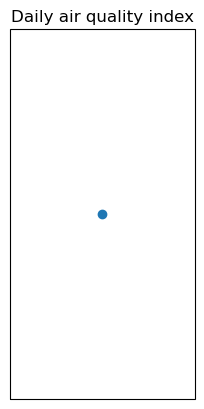

In [6]:
qplt.points(cube.collapsed("time", iris.analysis.MEAN))
plt.gca().coastlines()
plt.show()

#### Here is another example of some plotting options which can be used to view the data.

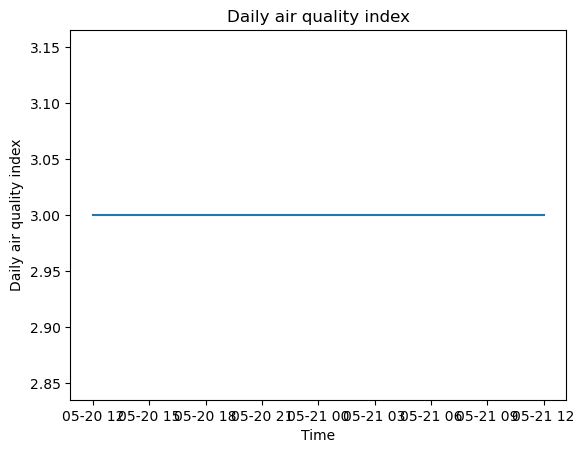

In [7]:
qplt.plot(iris.util.squeeze(cube))